In [1]:
import vectorbt as vbt
import pandas as pd 
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt


print('https://vectorbt.dev/api/returns/qs_adapter/')


https://vectorbt.dev/api/returns/qs_adapter/


In [2]:
price = vbt.YFData.download('BTC-USD').get('Close')

fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 50)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
#pf.plot().show()


In [3]:
pf.assets()

Date
2014-09-17 00:00:00+00:00    0.000000
2014-09-18 00:00:00+00:00    0.000000
2014-09-19 00:00:00+00:00    0.000000
2014-09-20 00:00:00+00:00    0.000000
2014-09-21 00:00:00+00:00    0.000000
                               ...   
2023-10-08 00:00:00+00:00    0.540193
2023-10-09 00:00:00+00:00    0.540193
2023-10-10 00:00:00+00:00    0.540193
2023-10-11 00:00:00+00:00    0.540193
2023-10-12 00:00:00+00:00    0.540193
Freq: D, Length: 3313, dtype: float64

In [4]:
pf.orders.records_readable


,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2014-11-14 00:00:00+00:00,0.251371,397.817993,0.0,Buy
1,1,0,2014-11-29 00:00:00+00:00,0.251371,375.490997,0.0,Sell
2,2,0,2014-11-30 00:00:00+00:00,0.249672,378.046997,0.0,Buy
3,3,0,2014-12-13 00:00:00+00:00,0.249672,347.376007,0.0,Sell
4,4,0,2015-02-21 00:00:00+00:00,0.354674,244.533997,0.0,Buy
...,...,...,...,...,...,...,...
72,72,0,2023-03-18 00:00:00+00:00,0.574709,26965.878906,0.0,Buy
73,73,0,2023-05-10 00:00:00+00:00,0.574709,27621.755859,0.0,Sell
74,74,0,2023-06-23 00:00:00+00:00,0.517160,30695.468750,0.0,Buy
75,75,0,2023-07-31 00:00:00+00:00,0.517160,29230.111328,0.0,Sell


In [5]:
fig = price.vbt.plot(trace_kwargs=dict(name='Close'))
fast_ma.ma.vbt.plot(trace_kwargs=dict(name='Fast MA'), fig=fig)
slow_ma.ma.vbt.plot(trace_kwargs=dict(name='Slow MA'), fig=fig)
pf.positions.plot(close_trace_kwargs=dict(visible=False), fig=fig)

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

FigureWidget({
    'data': [{'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '1d61a793-88ff-4d41-9bd8-8e8d8c007b5e',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 10, 10, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 11, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 12, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([  457.33401489,   424.44000244,   394.79598999, ..., 27391.01953125,
                          26873.3203125 , 26687.77539062])},
             {'name': 'Fast MA',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'a9e4106a-8ec6-492c-a058-245c7d87588e',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 10, 10, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 11, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 12, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([           nan,            nan,            nan, ..., 27698.50449219,
                          27587.46152344, 27503.16054687])},
             {'name': 'Slow MA',
              'showlegend': True,
              'type': 'scatter',
              'uid': '50f8560f-560f-42a6-92ad-4b8e0afeb7ff',
              'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 10, 10, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 11, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 12, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([           nan,            nan,            nan, ..., 26600.05824219,
                          26616.89152344, 26622.01421875])},
             {'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '71303f66-4ec9-4a20-8971-3c7f577a9840',
              'visible': False,
              'x': array([datetime.datetime(2014, 9, 17, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 18, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2014, 9, 19, 0, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2023, 10, 10, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 11, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2023, 10, 12, 0, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([  457.33401489,   424.44000244,   394.79598999, ..., 27391.01953125,
                          26873.3203125 , 26687.77539062])},
             {'customdata': array([[0, 0.2513712343794349, 0.0, 'Long'],
                                   [1, 0.24967169749993842, 0.0, 'Long'],
                                   [2, 0.35467

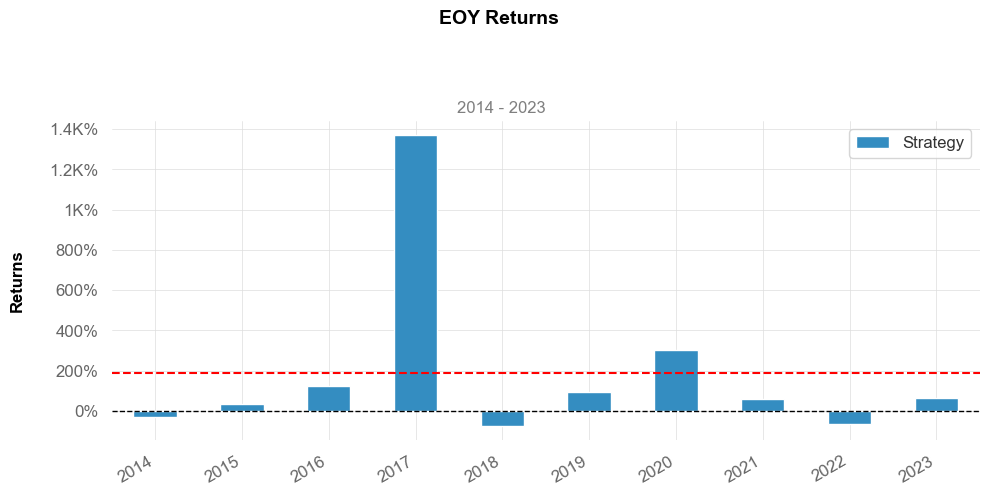

In [6]:
returns = price.vbt.to_returns()
returns.vbt.returns.qs.plot_yearly_returns()

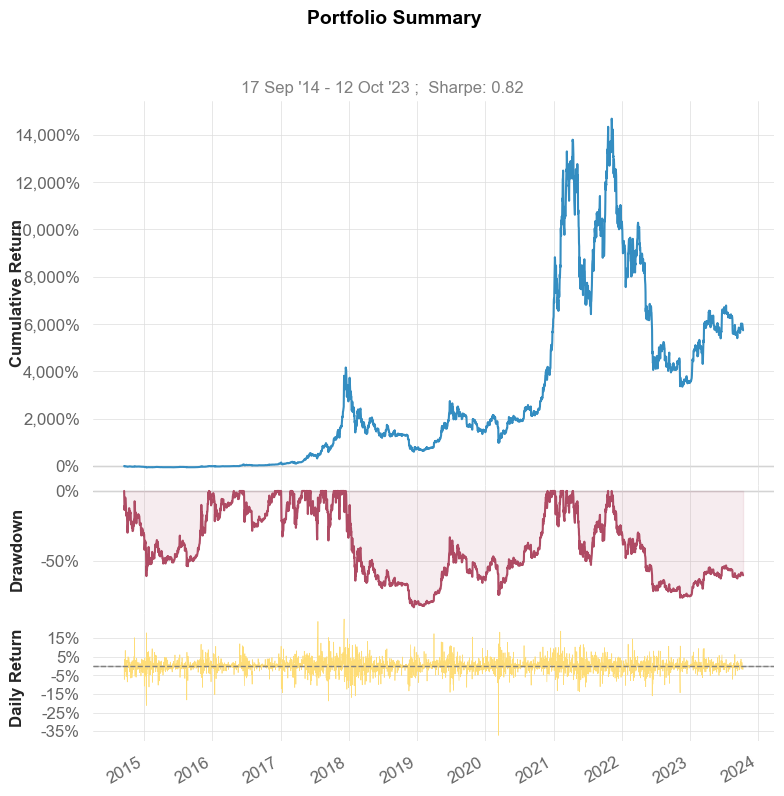

TypeError: pivot() takes 1 positional argument but 4 were given

In [7]:
returns.vbt.returns.qs.plots_report()

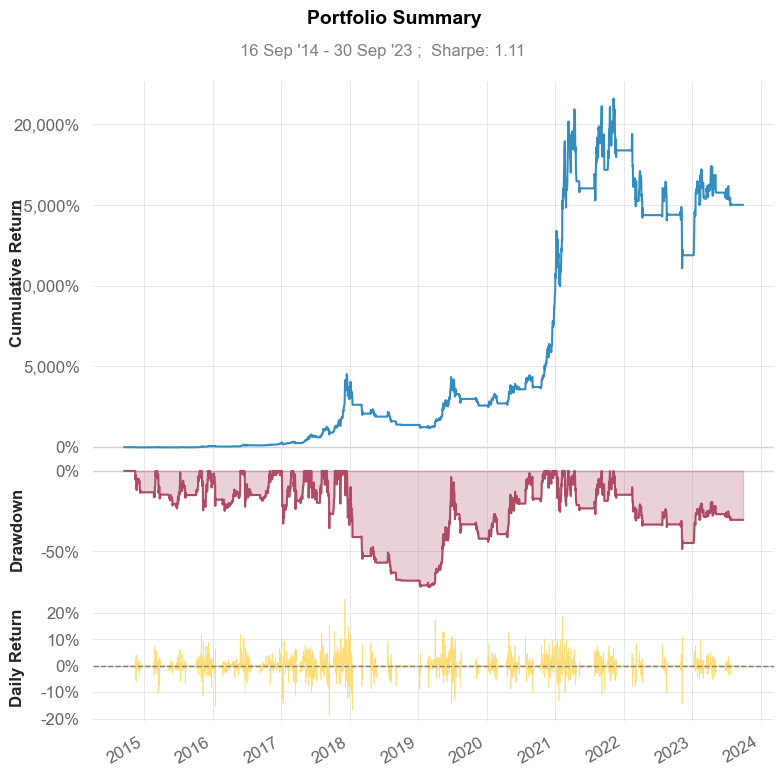

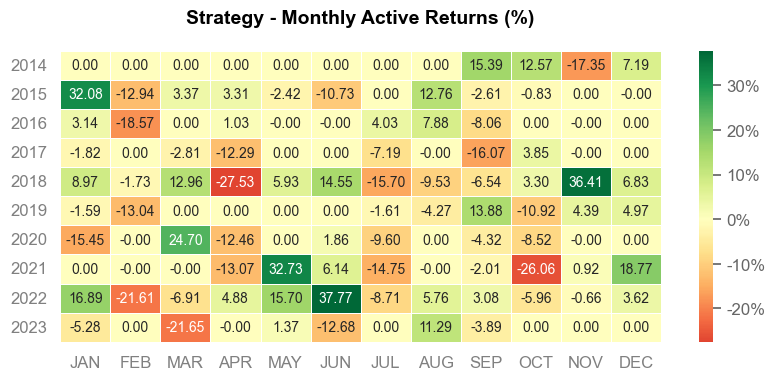

In [57]:
#vbt.settings.array_wrapper.freq = 'D'

pf.qs.plots_report()


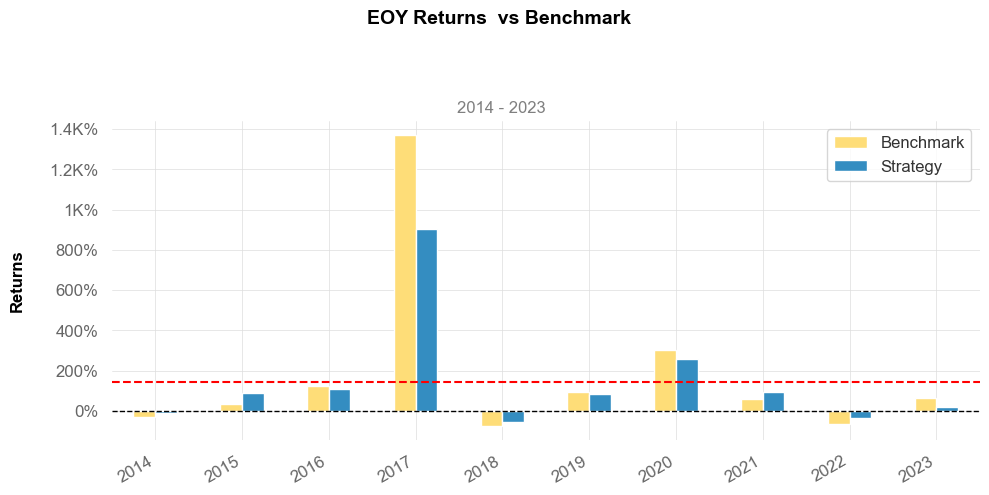

In [8]:
pf.qs.plot_yearly_returns()


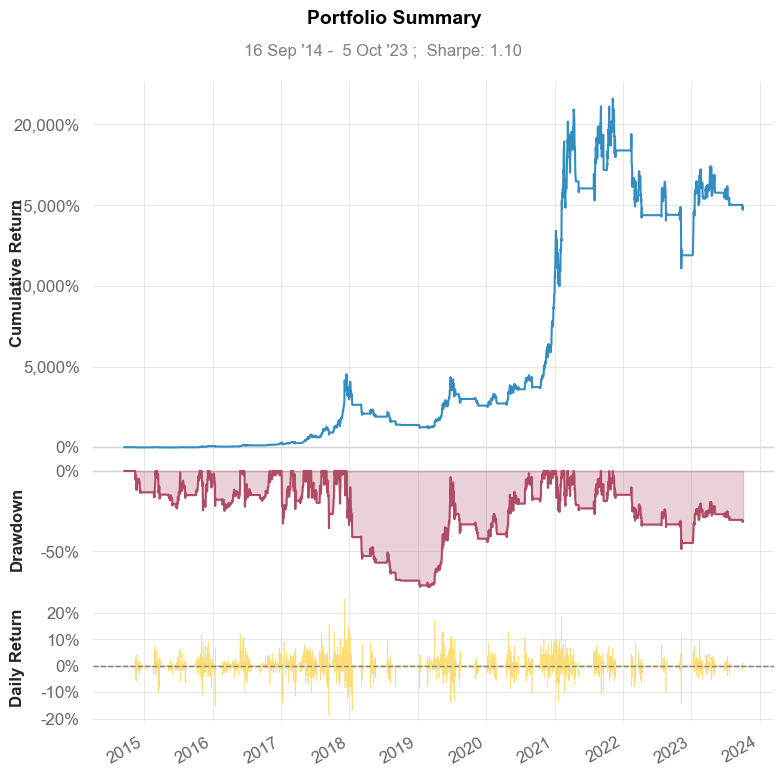

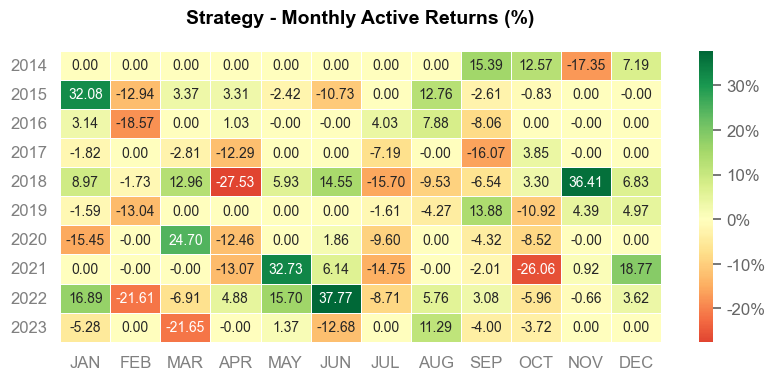

In [5]:
show_stats(pf)

In [9]:
returns.vbt.returns.qs.plot_monthly_returns(
    annot_size=10,
    figsize=(10, 5),
    cbar=True,
    square=False,
    compounded=True,
    eoy=False,
    grayscale=False,
    fontname='Arial',
    ylabel=True,
    savefig=None,
    show=True
)

TypeError: pivot() takes 1 positional argument but 4 were given

In [50]:
1913*3

5739

In [10]:
def show_stats(pf):
    """
    Show a plots report for a given portfolio using QuantStats.

    Parameters:
    pf (QuantStats): The QuantStats portfolio object to generate a plots report for.
    type of pf :<vectorbt.portfolio.base.Portfolio at 0x14af11f40>

    Returns:
    None
    """
    vbt.settings.array_wrapper.freq = 'D'
    pf.qs.plots_report()
    return None
